In [820]:
# Dependencies
import pandas as pd
from pathlib import Path
import scipy.stats as st
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from datetime import datetime

In [821]:
# --- Set filepath for file to analyze ---
# NOTE: Edit this for each new file being run
zillow_csv_path = Path('Zillow_Data/Metro_invt_fs_uc_sfrcondo_sm_month.csv')
zillow_metric_name = 'Inventory'

In [822]:
# --- Create a data frame containing the data from the CSV ---
# Load the CSV
zillow_df = pd.read_csv(zillow_csv_path)
# Insert 'US' as the state name for the United States region, so it shows up in state summary
zillow_df.at[0,"StateName"] = 'US'
# Rename labels
zillow_df.rename(columns={'SizeRank': 'Size Rank', 'RegionName': 'Metro Area', 'StateName': 'State' }, inplace=True)
# Remove the RegionType column
zillow_df = zillow_df.drop('RegionType', axis = 1)
# Insert a new blank column to store the Size Segment
zillow_df['Size Segment'] = pd.NA
# Re-order columns so that Size Segment is next to Size Rank
columns = zillow_df.columns.tolist()
columns.remove('Size Segment')
columns.insert(2, 'Size Segment')
zillow_df = zillow_df[columns]
# Establish Size Segments as bins
size_segment_bins = [-1, 0, 100, 200, 300, 400, 500, 1000]
size_segment_labels = ["National Average", "Top 100", "101 - 200", "201 - 300", "301 - 400", "401 - 500", "Bottom 500"]
# Insert segment values into Size Segment column
zillow_df['Size Segment'] = pd.cut(zillow_df["Size Rank"], bins=size_segment_bins, labels=size_segment_labels)
# Select only the columns with date information and the 'Size Segment' column
date_columns = [col for col in zillow_df.columns if isinstance(col, str) and col.startswith('2018') or col.startswith('2019') or col.startswith('2020') or col.startswith('2021') or col.startswith('2022') or col.startswith('2023')]
columns_of_interest = ['RegionID', 'Size Rank', 'Size Segment', 'Metro Area', 'State'] + date_columns
zillow_df= zillow_df[columns_of_interest]
# Create a unique data frame which is named after the metric currently being analyzed:
# Set the df name as a string equal to the zillow metric name, with spaces replaced with underscores and in all lowercase
zillow_unique_df_name = zillow_metric_name.replace(" ", "_").lower() + "_df"
globals()[zillow_unique_df_name] = zillow_df.copy()
print(f'Created new dataframe: {zillow_unique_df_name}')
# Print the first few rows of the DataFrame
zillow_df.head()


Created new dataframe: inventory_df


,RegionID,Size Rank,Size Segment,Metro Area,State,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,...,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31
0,102001,0,National Average,United States,US,1421529.0,1500193.0,1592414.0,1660614.0,1709143.0,...,835429.0,845834.0,880510.0,907228.0,930911.0,950311.0,959735.0,977241.0,970238.0,932240.0
1,394913,1,Top 100,"New York, NY",NY,73707.0,80345.0,85864.0,90067.0,91881.0,...,43253.0,44197.0,45829.0,46198.0,45506.0,43956.0,42515.0,42586.0,42068.0,39540.0
2,753899,2,Top 100,"Los Angeles, CA",CA,21998.0,23784.0,25605.0,27109.0,28811.0,...,15214.0,15103.0,15283.0,15378.0,15689.0,15969.0,16032.0,16167.0,15877.0,14897.0
3,394463,3,Top 100,"Chicago, IL",IL,38581.0,42253.0,45757.0,47492.0,48984.0,...,20922.0,21214.0,22091.0,22706.0,23228.0,23568.0,23569.0,23707.0,22957.0,21135.0
4,394514,4,Top 100,"Dallas, TX",TX,24043.0,25876.0,28225.0,30490.0,32408.0,...,17053.0,17959.0,19987.0,21744.0,22748.0,23251.0,23342.0,23489.0,23305.0,22577.0


In [823]:
# --- Create a data frame segmented by state ---
# Create a data frame that summarizes the data by size segment
state_summary_df = zillow_df.groupby('State').mean('State').drop('RegionID',  axis = 1).drop('Size Rank',  axis = 1)
state_summary_df.reset_index(inplace=True)
state_summary_df.rename(columns={'State': 'Date'}, inplace = True)
state_summary_df.set_index('Date', inplace=True)
state_summary_df = state_summary_df.T
state_summary_df.reset_index(inplace=True)
state_summary_df.rename(columns={'index': 'Date'}, inplace=True)
state_summary_df['Date'] = pd.to_datetime(state_summary_df['Date'])
# Copy to uniquely named data frame
state_unique_df_name = zillow_metric_name.replace(" ", "_").lower() + "_df_state"
globals()[state_unique_df_name] = state_summary_df.copy()
print(f'Created new dataframe: {state_unique_df_name}')
state_summary_df.head()

Created new dataframe: inventory_df_state


Date,Date,AK,AL,AR,AZ,CA,CO,CT,DE,FL,...,TN,TX,US,UT,VA,VT,WA,WI,WV,WY
0,2018-03-31,595.75,1279.05,696.60,3738.636364,2445.882353,1182.647059,3309.4,2809.5,5911.241379,...,1136.307692,1509.044776,1421529.0,1015.000000,3167.785714,525.75,855.45,734.304348,524.625,336.000000
1,2018-04-30,637.75,1327.60,726.10,3819.727273,2652.500000,1300.764706,3631.2,2951.5,6012.344828,...,1185.884615,1600.223881,1500193.0,1094.666667,3504.428571,538.00,936.25,805.478261,538.500,344.888889
2,2018-05-31,701.75,1372.55,761.65,3842.636364,2875.205882,1451.000000,4033.2,3071.5,6032.724138,...,1251.692308,1709.134328,1592414.0,1215.555556,3813.642857,573.75,1095.80,900.304348,562.375,366.444444
3,2018-06-30,761.00,1396.70,789.40,3774.090909,3047.176471,1576.705882,4376.4,3147.5,5902.000000,...,1307.423077,1793.089552,1660614.0,1319.444444,3902.428571,618.25,1228.55,964.782609,587.000,389.666667
4,2018-07-31,823.50,1397.40,805.35,3657.181818,3218.323529,1668.647059,4411.4,3110.5,5767.620690,...,1355.500000,1861.194030,1709143.0,1402.888889,3841.714286,720.75,1341.70,1023.521739,605.875,407.000000


In [824]:
# --- Create a data frame segmented by size rank ---
# Group by 'Size Segment' and calculate the mean for each segment
zillow_df_mean = zillow_df.groupby('Size Segment', observed = False).mean('Size Segment').drop('RegionID',  axis = 1).drop('Size Rank',  axis = 1)
# Reset the index for better display
zillow_df_mean.reset_index(inplace=True)
zillow_df_mean.rename(columns={'Size Segment': 'Date'}, inplace = True)
zillow_df_mean.set_index('Date', inplace=True)
zillow_df_mean = zillow_df_mean.T
zillow_df_mean.reset_index(inplace=True)
zillow_df_mean.rename(columns={'index': 'Date'}, inplace=True)
zillow_df_mean['Date'] = pd.to_datetime(zillow_df_mean['Date'])
# Create uniquely named data frame
size_unique_df_name = zillow_metric_name.replace(" ", "_").lower() + "_df_size"
globals()[size_unique_df_name] = zillow_df_mean.copy()
print(f'Created new dataframe: {size_unique_df_name }')
zillow_df_mean.head()

Created new dataframe: inventory_df_size


Date,Date,National Average,Top 100,101 - 200,201 - 300,301 - 400,401 - 500,Bottom 500
0,2018-03-31,1421529.0,8455.387755,1836.171717,995.642857,569.153061,460.670103,217.046569
1,2018-04-30,1500193.0,9016.153061,1915.979798,1038.612245,592.979592,474.773196,225.093137
2,2018-05-31,1592414.0,9623.020408,2011.222222,1087.653061,628.387755,495.917526,237.549020
3,2018-06-30,1660614.0,10008.408163,2071.777778,1127.071429,663.795918,517.505155,250.652812
4,2018-07-31,1709143.0,10245.183673,2121.707071,1159.918367,692.704082,536.804124,261.897311


In [825]:
interest_rates_csv_path = Path('Zillow_Data/fed-funds-rate-historical-chart-modified.csv')
interest_rates_df = pd.read_csv(interest_rates_csv_path)
interest_rates_df['Date'] = pd.to_datetime(interest_rates_df['Date'])
interest_rates_df

,Date,Federal Funds Rate
0,1954-07-01,1.13
1,1954-07-02,1.25
2,1954-07-03,1.25
3,1954-07-04,1.25
4,1954-07-05,0.88
...,...,...
24914,2024-08-24,NaN
24915,2024-08-25,NaN
24916,2024-08-26,NaN
24917,2024-08-27,NaN


In [826]:
# Merge inventory data with interest rates
inventory_index_vs_interest_rate_df = pd.merge(inventory_df_size, interest_rates_df, on="Date", how='inner')

# Display the merged DataFrame
inventory_index_vs_interest_rate_df



,Date,National Average,Top 100,101 - 200,201 - 300,301 - 400,401 - 500,Bottom 500,Federal Funds Rate
0,2018-03-31,1421529.0,8455.387755,1836.171717,995.642857,569.153061,460.670103,217.046569,1.67
1,2018-04-30,1500193.0,9016.153061,1915.979798,1038.612245,592.979592,474.773196,225.093137,1.69
2,2018-05-31,1592414.0,9623.020408,2011.222222,1087.653061,628.387755,495.917526,237.549020,1.70
3,2018-07-31,1709143.0,10245.183673,2121.707071,1159.918367,692.704082,536.804124,261.897311,1.91
4,2018-08-31,1733388.0,10330.959184,2153.080808,1180.081633,710.836735,550.072165,269.388753,1.91
5,2018-10-31,1701371.0,10184.387755,2113.939394,1157.234694,694.765306,536.319588,261.677262,2.20
6,2018-11-30,1642145.0,9876.081633,2038.464646,1113.714286,662.673469,513.164948,249.872861,2.20
7,2018-12-31,1541994.0,9270.418367,1926.888889,1047.785714,617.877551,481.876289,233.911980,2.40
8,2019-01-31,1452603.0,8737.346939,1828.181818,990.683673,575.795918,453.659794,219.097800,2.40
9,2019-02-28,1405515.0,8492.561224,1771.606061,960.948980,547.510204,436.443299,209.608802,2.40


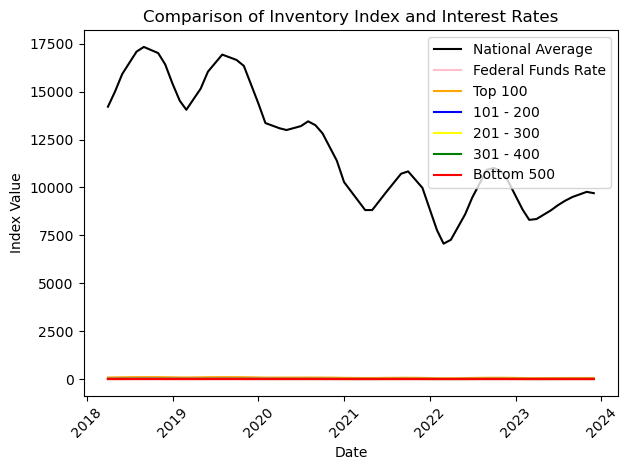

In [827]:
# Plot inventory data against interest rates
plt.plot(inventory_index_vs_interest_rate_df['Date'], inventory_index_vs_interest_rate_df['National Average'] / 100, label = "National Average", color = "black")
plt.plot(inventory_index_vs_interest_rate_df['Date'], inventory_index_vs_interest_rate_df['Federal Funds Rate'] / 10, label = "Federal Funds Rate", color = "pink")
plt.plot(inventory_index_vs_interest_rate_df['Date'], inventory_index_vs_interest_rate_df['Top 100'] / 100, label = "Top 100", color = "orange")
plt.plot(inventory_index_vs_interest_rate_df['Date'], inventory_index_vs_interest_rate_df['101 - 200'] / 100, label = "101 - 200", color = "blue")
plt.plot(inventory_index_vs_interest_rate_df['Date'], inventory_index_vs_interest_rate_df['201 - 300'] / 100, label = "201 - 300", color = "yellow")
plt.plot(inventory_index_vs_interest_rate_df['Date'], inventory_index_vs_interest_rate_df['301 - 400'] / 100, label = "301 - 400", color = "green")
plt.plot(inventory_index_vs_interest_rate_df['Date'], inventory_index_vs_interest_rate_df['Bottom 500'] / 100, label = "Bottom 500", color = "red")

# Add labels and title
plt.title('Comparison of Inventory Index and Interest Rates')
plt.xlabel('Date')
plt.ylabel('Index Value')

# Add legend (key)
plt.legend(loc='upper right')

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Adjust layout to fit everything
plt.tight_layout()

# Show plot
plt.show()

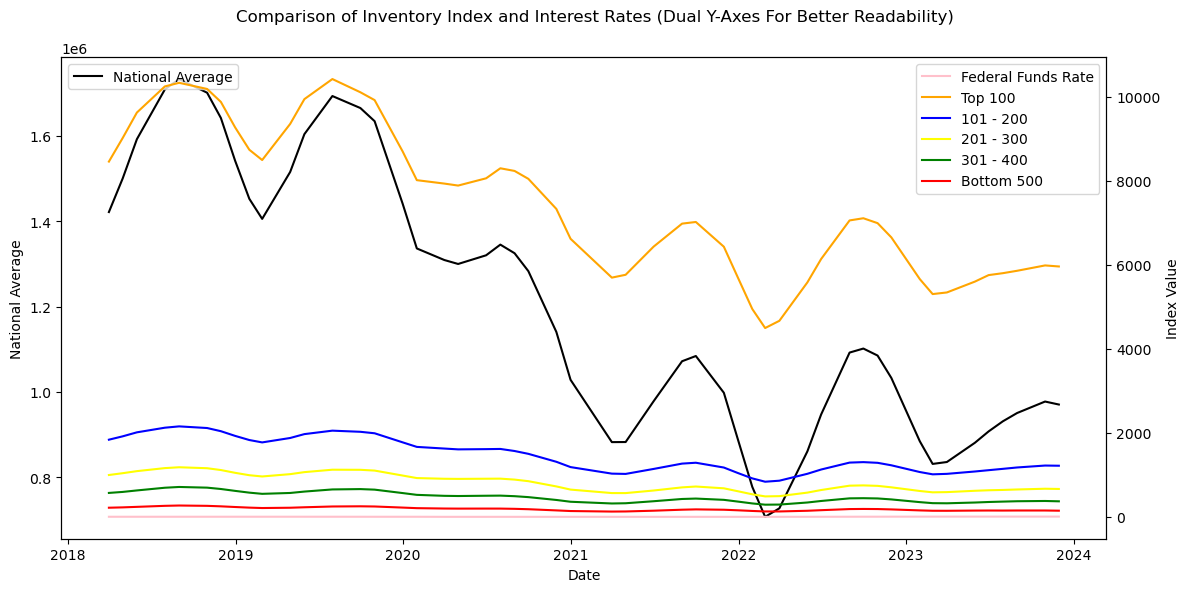

In [828]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot National Average on the primary y-axis
ax1.plot(inventory_index_vs_interest_rate_df['Date'], inventory_index_vs_interest_rate_df['National Average'], label="National Average", color="black")
ax1.set_xlabel('Date')
ax1.set_ylabel('National Average', color="black")
ax1.tick_params(axis='y', labelcolor="black")

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot other data series on the secondary y-axis
ax2.plot(inventory_index_vs_interest_rate_df['Date'], inventory_index_vs_interest_rate_df['Federal Funds Rate'], label="Federal Funds Rate", color="pink")
ax2.plot(inventory_index_vs_interest_rate_df['Date'], inventory_index_vs_interest_rate_df['Top 100'], label="Top 100", color="orange")
ax2.plot(inventory_index_vs_interest_rate_df['Date'], inventory_index_vs_interest_rate_df['101 - 200'], label="101 - 200", color="blue")
ax2.plot(inventory_index_vs_interest_rate_df['Date'], inventory_index_vs_interest_rate_df['201 - 300'], label="201 - 300", color="yellow")
ax2.plot(inventory_index_vs_interest_rate_df['Date'], inventory_index_vs_interest_rate_df['301 - 400'], label="301 - 400", color="green")
ax2.plot(inventory_index_vs_interest_rate_df['Date'], inventory_index_vs_interest_rate_df['Bottom 500'], label="Bottom 500", color="red")

ax2.set_ylabel('Index Value', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Add title and legend
fig.suptitle('Comparison of Inventory Index and Interest Rates (Dual Y-Axes For Better Readability)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Adjust layout to fit everything
plt.tight_layout()
plt.show()


In [829]:
# Calculate correlation between Inventory Index and Federal Funds Rate
corr_inventory_index_interest_rates = inventory_index_vs_interest_rate_df['National Average'].corr(inventory_index_vs_interest_rate_df['Federal Funds Rate'])
corr_inventory_index_interest_rates


-0.10479027378438015

In [830]:
#Calculate the correlation for prepandemic years (2018-2019)
start_date = '2018-01-01'
end_date = '2019-12-31'
inventory_index_vs_interest_rate_df_prepandemic = inventory_index_vs_interest_rate_df[(inventory_index_vs_interest_rate_df['Date'] >= start_date) & (inventory_index_vs_interest_rate_df['Date'] <= end_date)]
corr_inventory_index_vs_interest_rate_df_prepandemic = inventory_index_vs_interest_rate_df_prepandemic['National Average'].corr(inventory_index_vs_interest_rate_df_prepandemic['Federal Funds Rate'])
corr_inventory_index_vs_interest_rate_df_prepandemic

0.011984351074497935

In [831]:
# Calculate the correlation for pandemic years (2020-2021)
start_date = '2020-01-01'
end_date = '2021-12-31'
inventory_index_vs_interest_rate_df_pandemic = inventory_index_vs_interest_rate_df[(inventory_index_vs_interest_rate_df['Date'] >= start_date) & (inventory_index_vs_interest_rate_df['Date'] <= end_date)]
corr_inventory_index_vs_interest_rates_pandemic = inventory_vs_interest_rate_df_pandemic['National Average'].corr(inventory_vs_interest_rate_df_pandemic['Federal Funds Rate'])
corr_inventory_index_vs_interest_rates_pandemic


0.3160734482064571

In [832]:
# Calculate the correlation for post-pandemic period years (2022-2023)
start_date = '2022-01-01'
end_date = '2023-12-31'
inventory_index_vs_interest_rate_df_postpandemic = inventory_index_vs_interest_rate_df[(inventory_index_vs_interest_rate_df['Date'] >= start_date) & (inventory_index_vs_interest_rate_df['Date'] <= end_date)]
corr_inventory_index_vs_interest_rates_postpandemic = inventory_index_vs_interest_rate_df_postpandemic['National Average'].corr(inventory_index_vs_interest_rate_df_postpandemic['Federal Funds Rate'])
corr_inventory_index_vs_interest_rates_postpandemic


0.3940765760198499

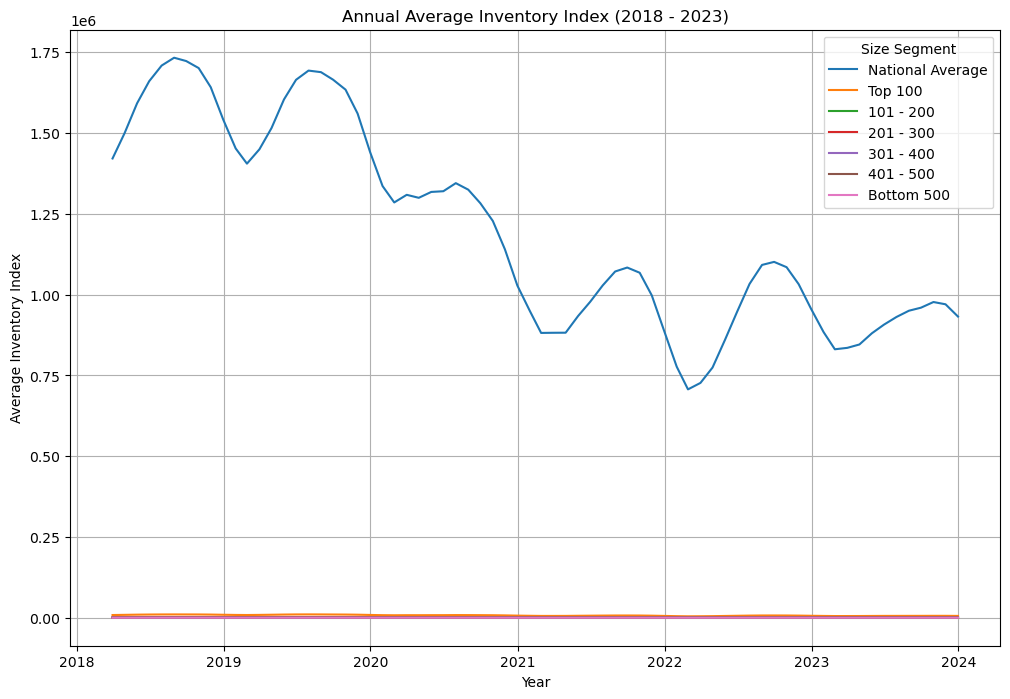

In [833]:
# Plot the inventory index by size rank per year
plt.figure(figsize=(12,8))
for col in inventory_df_size.columns[1:]:
    plt.plot(inventory_df_size['Date'], inventory_df_size[col], label=col)

plt.title('Annual Average Inventory Index (2018 - 2023)')
plt.xlabel('Year')
plt.ylabel('Average Inventory Index')
plt.legend(title='Size Segment')
plt.grid(True)
plt.show()



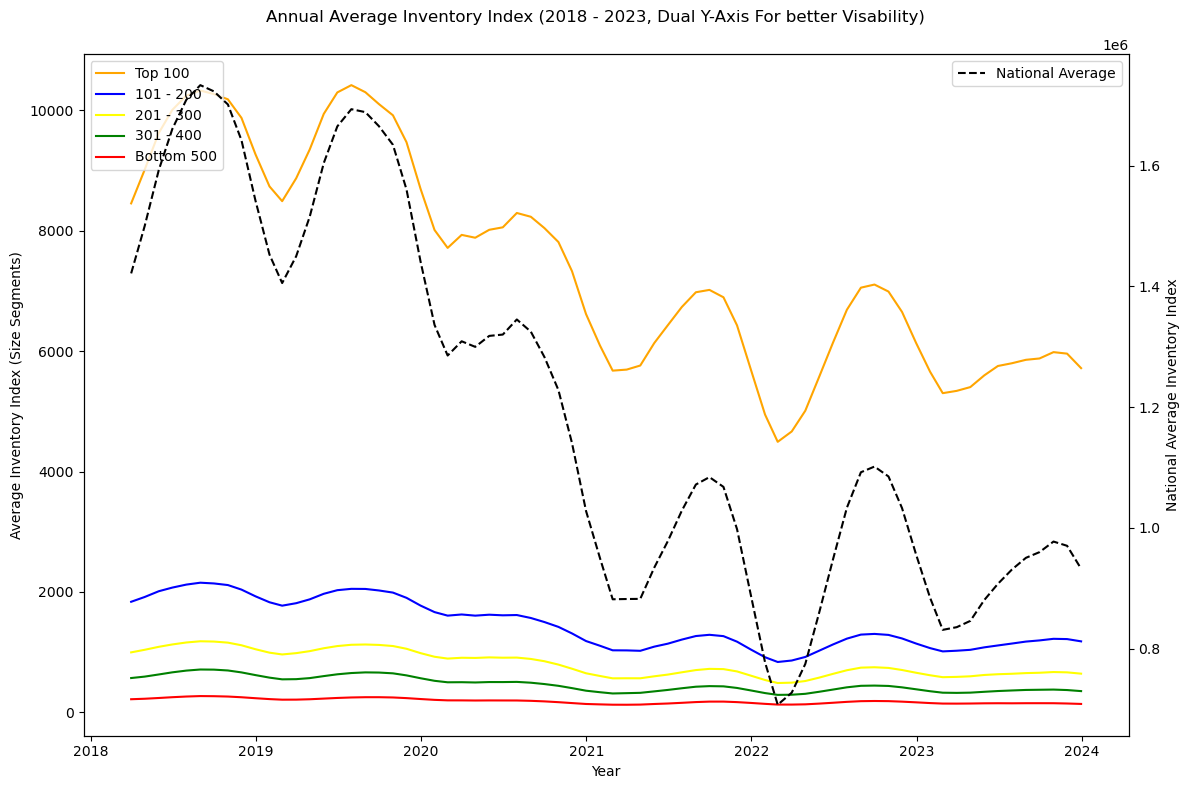

In [938]:
# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(12, 8))
# Plot the first set of data (e.g., National Average) on the primary y-axis
ax1.plot(inventory_df_size['Date'], inventory_df_size['Top 100'], label='Top 100', color='orange')
ax1.plot(inventory_df_size['Date'], inventory_df_size['101 - 200'], label='101 - 200', color='blue')
ax1.plot(inventory_df_size['Date'], inventory_df_size['201 - 300'], label='201 - 300', color='yellow')
ax1.plot(inventory_df_size['Date'], inventory_df_size['301 - 400'], label='301 - 400', color='green')
ax1.plot(inventory_df_size['Date'], inventory_df_size['Bottom 500'], label='Bottom 500', color='red')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Inventory Index (Size Segments)', color='black')
ax1.tick_params(axis='y', labelcolor='black')
# Create a secondary y-axis
ax2 = ax1.twinx()
# Plot the second set of data (e.g., National Average) on the secondary y-axis
ax2.plot(inventory_df_size['Date'], inventory_df_size['National Average'], label='National Average', color='black', linestyle='--')
ax2.set_ylabel('National Average Inventory Index', color='black')
ax2.tick_params(axis='y', labelcolor='black')
# Add title and legends
fig.suptitle('Annual Average Inventory Index (2018 - 2023, Dual Y-Axis For better Visability)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
# Rotate date labels for better readability
plt.xticks(rotation=45)
# Adjust layout to fit everything
plt.tight_layout()
# Show the plot
plt.show()


In [835]:
# Reshape the DataFrame from wide to long format
zillow_df_long = zillow_df.melt(id_vars=['RegionID', 'Size Rank', 'Size Segment', 'Metro Area', 'State'], 
                                var_name='Date', 
                                value_name=zillow_metric_name)
# Convert Date column to datetime format
zillow_df_long['Date'] = pd.to_datetime(zillow_df_long['Date'], format='%Y-%m-%d')
# Set Date as index
zillow_df_long.set_index('Date', inplace=True)
# Ensure data is sorted by Date
zillow_df_long.sort_index(inplace=True)
# Ensure there are no NaN values in the metric column before calculating percent change
zillow_df_long[zillow_metric_name] = zillow_df_long[zillow_metric_name].ffill()
# Extract Year and Month from the Date
zillow_df_long['Year'] = zillow_df_long.index.year
zillow_df_long['Month'] = zillow_df_long.index.month
# Ensure the Date column is set as index again after adding Year and Month
zillow_df_long.set_index(['RegionID', 'Size Rank', 'Size Segment', 'Metro Area', 'State', 'Year'], inplace=True)
# Create a DataFrame to calculate yearly percent change
def calculate_yearly_percent_change(df):
    # Get the rent index values for January and December
    january_values = df[df['Month'] == 1].groupby('Year')[zillow_metric_name].first()
    december_values = df[df['Month'] == 12].groupby('Year')[zillow_metric_name].last()
        # Merge January and December values into a single DataFrame
    year_df = pd.DataFrame({
        'Inventory Index_Jan': january_values,
        'Inventory Index_Dec': december_values
    }).dropna()
    # Calculate the percent change
    year_df['Yearly Percent Change'] = ((year_df['Inventory Index_Dec'] - year_df['Inventory Index_Jan']) / year_df['Inventory Index_Jan']) * 100
    # Reset index to include Year
    year_df.reset_index(inplace=True)
    return year_df
# Apply the function to each region and metric combination
yearly_percent_changes = zillow_df_long.groupby(['RegionID', 'Size Rank', 'Size Segment', 'Metro Area', 'State'], observed=True).apply(calculate_yearly_percent_change).reset_index(drop=True)
# Create a unique DataFrame named after the metric being analyzed
zillow_unique_df_name = zillow_metric_name.replace(" ", "_").lower() + "_yearly_percent_change_df"
globals()[zillow_unique_df_name] = yearly_percent_changes
print(f'Created new dataframe: {zillow_unique_df_name}')
# Display the updated DataFrame
yearly_percent_changes

Created new dataframe: inventory_yearly_percent_change_df


,Year,Inventory Index_Jan,Inventory Index_Dec,Yearly Percent Change
0,2019,1452603.0,1441428.0,-0.769309
1,2020,1336187.0,1028143.0,-23.053959
2,2021,949576.0,887059.0,-6.583675
3,2022,777085.0,955889.0,23.009581
4,2023,884129.0,932240.0,5.441627
...,...,...,...,...
4635,2019,190.0,183.0,-3.684211
4636,2020,173.0,102.0,-41.040462
4637,2021,104.0,103.0,-0.961538
4638,2022,93.0,120.0,29.032258


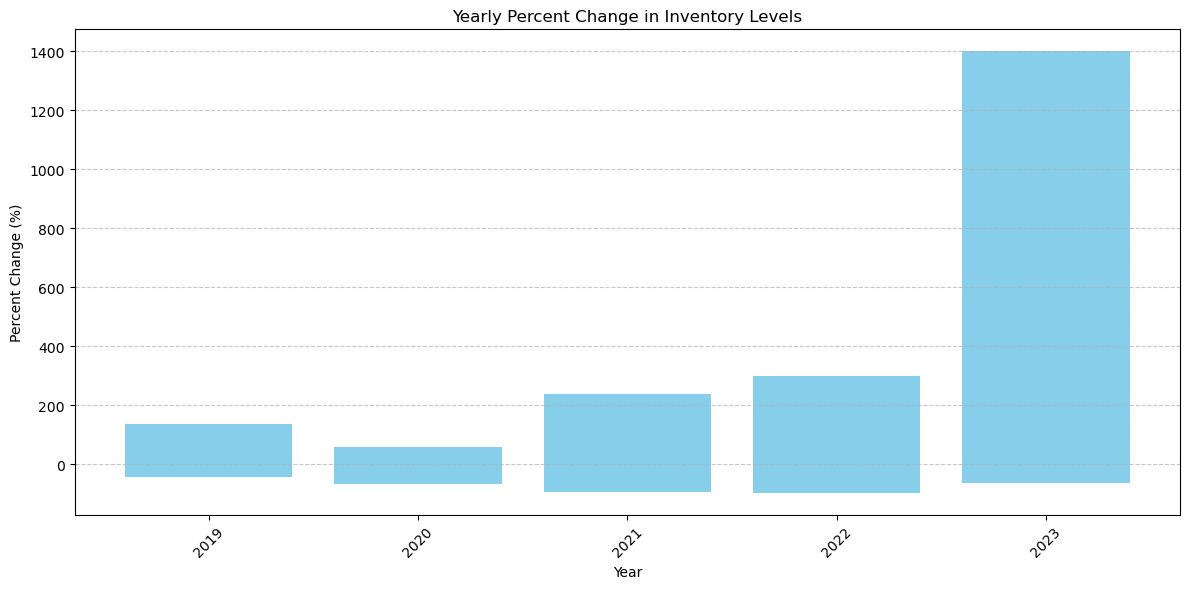

In [836]:
# Create a bar plot for yearly percent change
plt.figure(figsize=(12, 6))
plt.bar(yearly_percent_changes['Year'], yearly_percent_changes['Yearly Percent Change'], color='skyblue')
plt.title('Yearly Percent Change in Inventory Levels')
plt.xlabel('Year')
plt.ylabel('Percent Change (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [837]:
# Calculate mean inventory index
large_cities_mean_inventory = large_cities_inventory_trends['Inventory Index'].mean()
small_cities_mean_inventory = small_cities_inventory_trends['Inventory Index'].mean()

# Print the results
print(f"Mean Inventory Index for Large Cities: {large_cities_mean_inventory}")
print(f"Mean Inventory Index for Small Cities: {small_cities_mean_inventory}")


Mean Inventory Index for Large Cities: 19314.728
Mean Inventory Index for Small Cities: 466.1765873015873


In [873]:
# Calculate mean inventory index
large_cities_mean_inventory = large_cities_inventory_trends['Inventory Index'].mean()
small_cities_mean_inventory = small_cities_inventory_trends['Inventory Index'].mean()

# Calculate mean inventory index
large_cities_mean_inventory = large_cities_inventory_trends['Inventory Index'].mean()
small_cities_mean_inventory = small_cities_inventory_trends['Inventory Index'].mean()

# Calculate statistics for large cities
large_cities_mode_inventory = large_cities_inventory_trends['Inventory Index'].mode()
large_cities_median_inventory = large_cities_inventory_trends['Inventory Index'].median()
large_cities_std_inventory = large_cities_inventory_trends['Inventory Index'].std()
large_cities_variance_inventory = large_cities_inventory_trends['Inventory Index'].var()

# Calculate statistics for small cities
small_cities_mode_inventory = small_cities_inventory_trends['Inventory Index'].mode()
small_cities_median_inventory = small_cities_inventory_trends['Inventory Index'].median()
small_cities_std_inventory = small_cities_inventory_trends['Inventory Index'].std()
small_cities_variance_inventory = small_cities_inventory_trends['Inventory Index'].var()

# Print Large Cities Statistics
print("Large Cities Inventory Index Statistics:")
print(f"Mean: {large_cities_mean_inventory}")
print_mode_and_count(large_cities_inventory_trends, "Large Cities")
print(f"Median: {large_cities_median_inventory}")
print(f"Standard Deviation: {large_cities_std_inventory}")
print(f"Variance: {large_cities_variance_inventory}")

# Print Small Cities Statistics
print("\nSmall Cities Inventory Index Statistics:")
print(f"Mean: {small_cities_mean_inventory}")
print_mode_and_count(small_cities_inventory_trends, "Small Cities")
print(f"Median: {small_cities_median_inventory}")
print(f"Standard Deviation: {small_cities_std_inventory}")
print(f"Variance: {small_cities_variance_inventory}")


Large Cities Inventory Index Statistics:
Mean: 19314.728
Large Cities Most Frequent Mode: 11517.95
Large Cities Count of Most Frequent Mode: 1
Median: 17846.605
Standard Deviation: 4811.225153822637
Variance: 23147887.480775658

Small Cities Inventory Index Statistics:
Mean: 466.1765873015873
Small Cities Most Frequent Mode: 286.40700483091786
Small Cities Count of Most Frequent Mode: 1
Median: 427.2554347826087
Standard Deviation: 121.47705516017432
Variance: 14756.674930388035


In [839]:
# Resample and calculate mean for large cities
large_cities_inventory_trends = large_cities_df_long.resample('ME').mean(numeric_only=True)

# Resample and calculate mean for small cities
small_cities_inventory_trends = small_cities_df_long.resample('ME').mean(numeric_only=True)

# Ensure the 'Inventory Index' column is numeric after resampling
large_cities_inventory_trends['Inventory Index'] = pd.to_numeric(large_cities_inventory_trends['Inventory Index'], errors='coerce')
small_cities_inventory_trends['Inventory Index'] = pd.to_numeric(small_cities_inventory_trends['Inventory Index'], errors='coerce')

# Calculate mode by year
def calculate_mode(series):
    try:
        return series.mode().iloc[0]  # Return the first mode if there are multiple
    except IndexError:
        return np.nan  # Return NaN if there are no values

# Calculate statistics by year for large cities
large_cities_stats_by_year = large_cities_inventory_trends.groupby(large_cities_inventory_trends.index.year).agg({
    'Inventory Index': ['mean', calculate_mode, 'median', 'std', 'var']
})

# Flatten the MultiIndex columns
large_cities_stats_by_year.columns = ['Mean', 'Mode', 'Median', 'Standard Deviation', 'Variance']

# Calculate statistics by year for small cities
small_cities_stats_by_year = small_cities_inventory_trends.groupby(small_cities_inventory_trends.index.year).agg({
    'Inventory Index': ['mean', calculate_mode, 'median', 'std', 'var']
})

# Flatten the MultiIndex columns
small_cities_stats_by_year.columns = ['Mean', 'Mode', 'Median', 'Standard Deviation', 'Variance']

print("\nLarge Cities Inventory Index Statistics by Year:")
print(large_cities_stats_by_year)

print("\nSmall Cities Inventory Index Statistics by Year:")
print(small_cities_stats_by_year)




Large Cities Inventory Index Statistics by Year:
              Mean      Mode     Median  Standard Deviation      Variance
Date                                                                     
2018  25783.172000  22519.44  26281.915         1677.889103  2.815312e+06
2019  25030.011667  22397.09  25359.435         1767.106369  3.122665e+06
2020  20371.472500  16780.55  20810.720         1378.899747  1.901365e+06
2021  15927.542500  14389.98  15812.935         1317.666832  1.736246e+06
2022  15139.895833  11517.95  15589.780         2461.348772  6.058238e+06
2023  14714.347500  13559.14  14852.445          756.306343  5.719993e+05

Small Cities Inventory Index Statistics by Year:
            Mean        Mode      Median  Standard Deviation     Variance
Date                                                                     
2018  642.604348  573.076087  649.781401           40.036392  1602.912696
2019  604.272444  552.577295  607.082126           36.697371  1346.697034
2020  482.14

In [840]:
mean_large = large_cities_2020.mean()
mean_small = small_cities_2020.mean()
std_large = large_cities_2020.std()
std_small = small_cities_2020.std()
n_large = large_cities_2020.count()
n_small = small_cities_2020.count()

pooled_std = np.sqrt(((std_large**2 * (n_large - 1)) + (std_small**2 * (n_small - 1))) / (n_large + n_small - 2))
cohen_d = (mean_large - mean_small) / pooled_std
print(f"Cohen's d: {cohen_d}")


Cohen's d: 0.4801093972062412


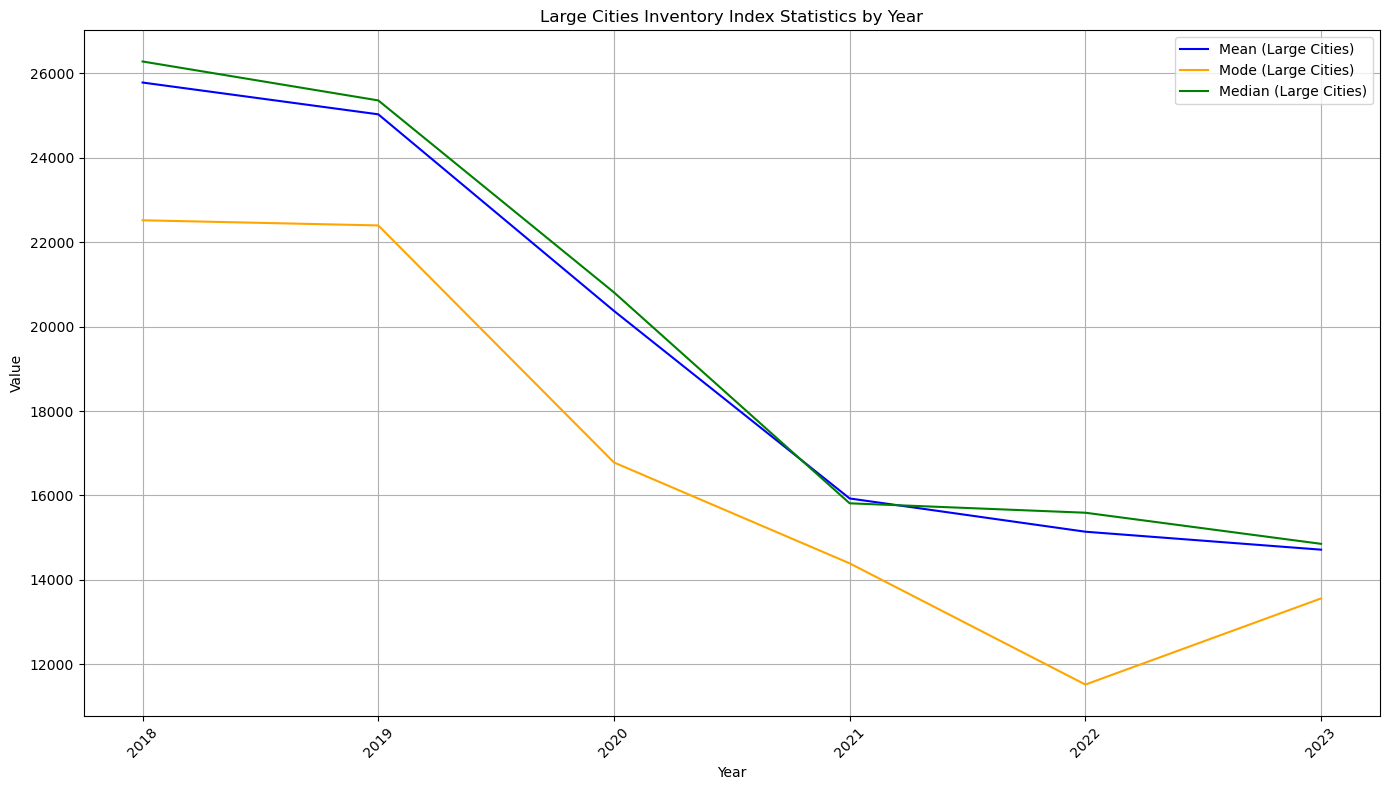

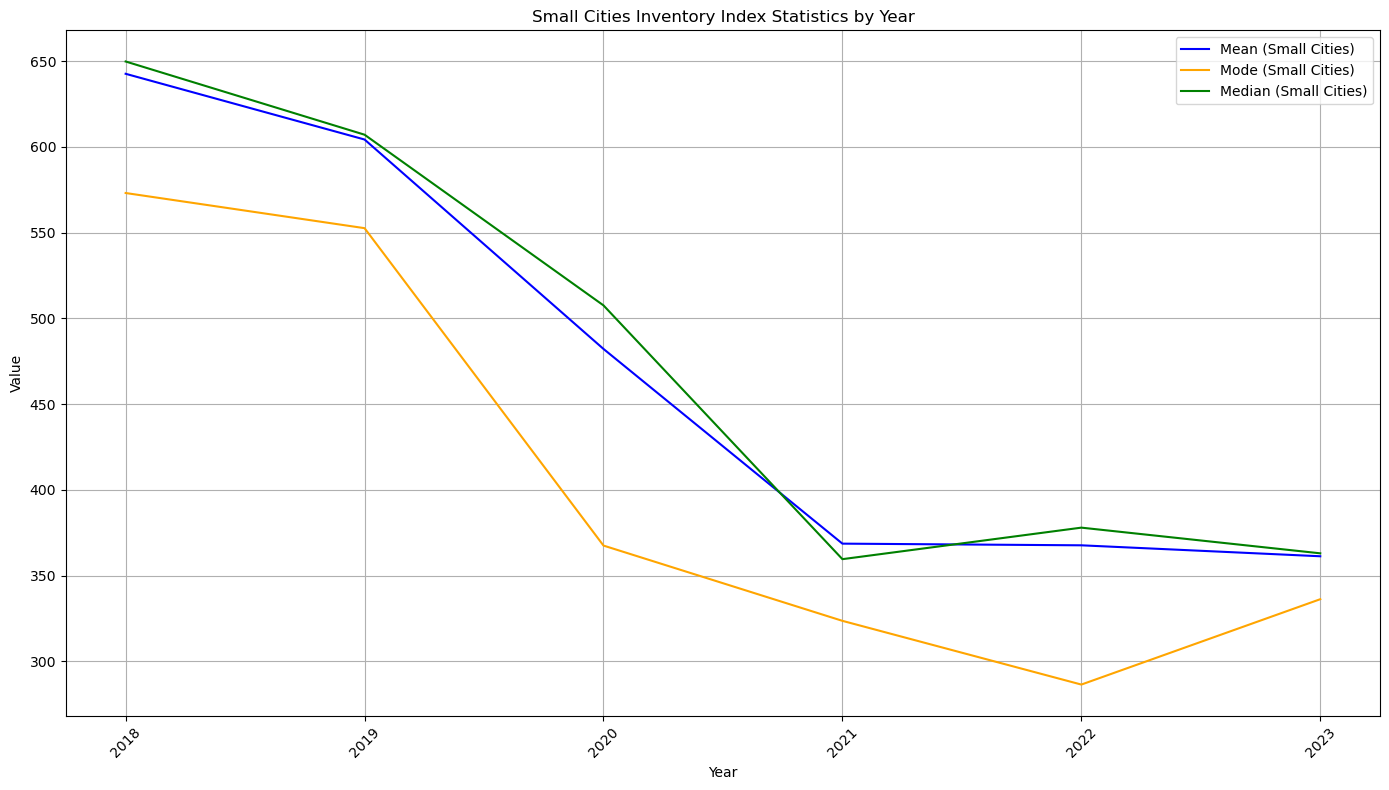

In [877]:
import matplotlib.pyplot as plt

# Plot statistics for large cities
plt.figure(figsize=(14, 8))

# Plot Mean
plt.plot(large_cities_stats_by_year.index, large_cities_stats_by_year['Mean'], label='Mean (Large Cities)', color='blue')
# Plot Mode
plt.plot(large_cities_stats_by_year.index, large_cities_stats_by_year['Mode'], label='Mode (Large Cities)', color='orange')
# Plot Median
plt.plot(large_cities_stats_by_year.index, large_cities_stats_by_year['Median'], label='Median (Large Cities)', color='green')

plt.title('Large Cities Inventory Index Statistics by Year')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot statistics for small cities
plt.figure(figsize=(14, 8))

# Plot Mean
plt.plot(small_cities_stats_by_year.index, small_cities_stats_by_year['Mean'], label='Mean (Small Cities)', color='blue')
# Plot Mode
plt.plot(small_cities_stats_by_year.index, small_cities_stats_by_year['Mode'], label='Mode (Small Cities)', color='orange')
# Plot Median
plt.plot(small_cities_stats_by_year.index, small_cities_stats_by_year['Median'], label='Median (Small Cities)', color='green')

plt.title('Small Cities Inventory Index Statistics by Year')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [841]:
# Combine large and small city data into a single DataFrame for ANOVA
combined_df = pd.concat([
    large_cities_df_long.assign(CitySize='Large'),
    small_cities_df_long.assign(CitySize='Small')])

# Perform ANOVA for inventory index by year and city size
anova_results = stats.f_oneway(
    combined_df[(combined_df['CitySize'] == 'Large') & (combined_df.index.year == 2020)]['Inventory Index'].dropna(),
    combined_df[(combined_df['CitySize'] == 'Small') & (combined_df.index.year == 2020)]['Inventory Index'].dropna())
print(f"ANOVA F-Statistic: {anova_results.statistic}, P-Value: {anova_results.pvalue}")


ANOVA F-Statistic: 246.7993546042154, P-Value: 5.0385975458100496e-55


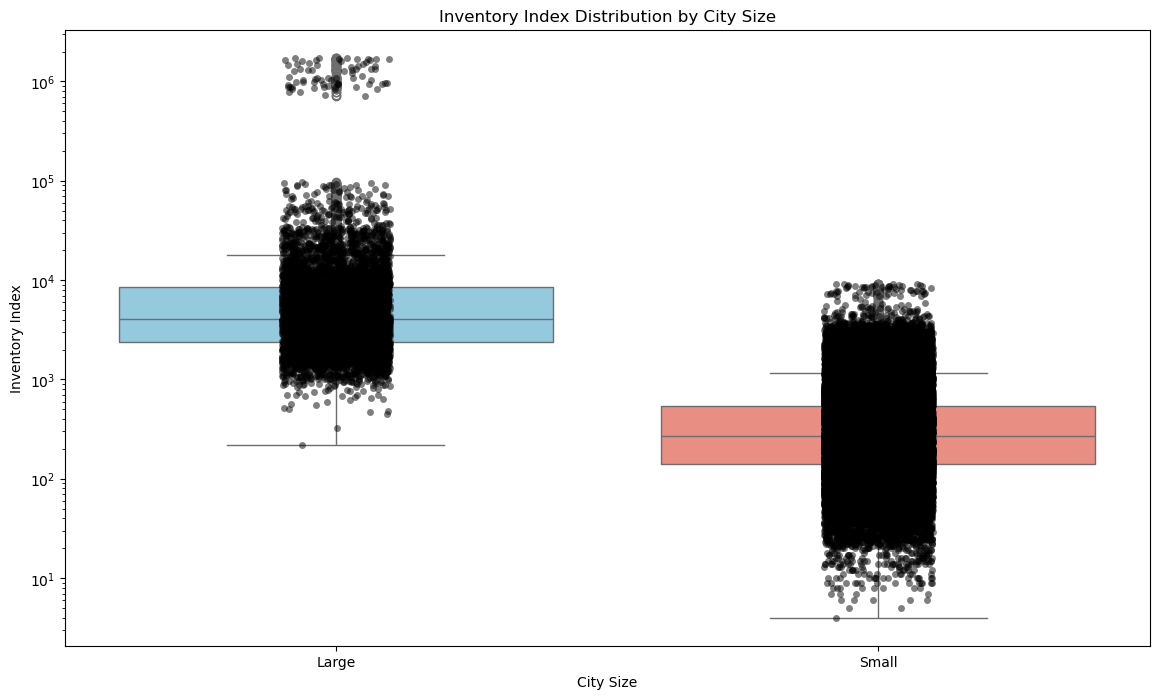

In [842]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.boxplot(x='CitySize', y='Inventory Index', data=combined_df, hue='CitySize', palette={'Large': 'skyblue', 'Small': 'salmon'}, dodge=False)
sns.stripplot(x='CitySize', y='Inventory Index', data=combined_df, color='k', alpha=0.5, jitter=True)
plt.title('Inventory Index Distribution by City Size')
plt.xlabel('City Size')
plt.ylabel('Inventory Index')
plt.yscale('log')
plt.show()



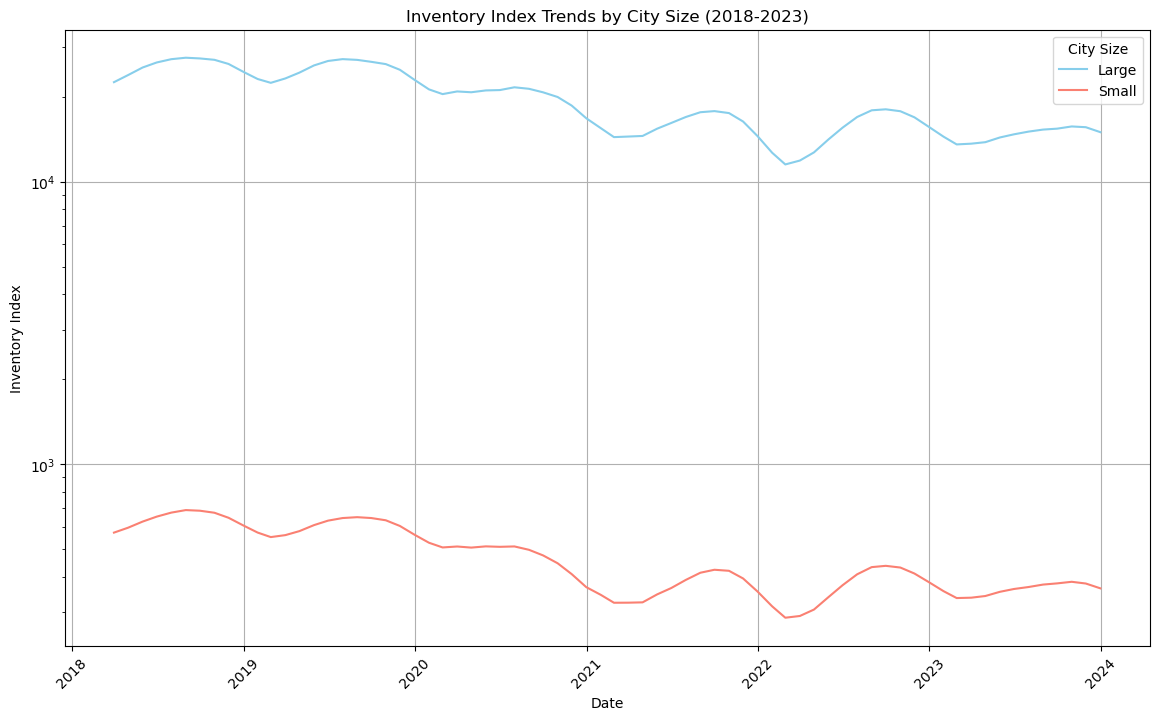

In [844]:
# Create a DataFrame combining both large and small cities data
combined_df = pd.concat([
    large_cities_inventory_trends.assign(CitySize='Large'),
    small_cities_inventory_trends.assign(CitySize='Small')])
# Plot
plt.figure(figsize=(14, 8))
sns.lineplot(data=combined_df, x=combined_df.index, y='Inventory Index', hue='CitySize', palette={'Large': 'skyblue', 'Small': 'salmon'})
# Adding titles and labels
plt.title('Inventory Index Trends by City Size (2018-2023)')
plt.xlabel('Date')
plt.ylabel('Inventory Index')
plt.legend(title='City Size')
plt.xticks(rotation=45)
plt.grid(True)
plt.yscale('log')
plt.show()
